![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39112556-23bf0856-46d9-11e8-8684-cd2b88b4950f.jpg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Classification Modelling

The `titanic` problem.

This dataset is made of information about the passengers of the famous Titanic ship, and whether they where lucky enough to survive its tragedy or not.

We will use these data for building a decision tree that will be able to predict the survival of a Titanic passenger.

<i>
> Dataset source: https://www.kaggle.com/c/titanic/data
</i>

### Dataset attribute information

<img src="https://user-images.githubusercontent.com/7065401/39112681-8506a72c-46d9-11e8-9a0d-2fef30c5390c.png"
    style="width:850px; margin: 0 auto;"></img>
    
- **Pclass**: is a proxy for socio-economic status (SES). 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
- **Age**: is in Years; Fractional if Age less than One (1). If the Age is Estimated, it is in the form xx.5
- With respect to the family relation variables (i.e. **sibsp** and **parch**) some relations were ignored.  The following are the definitions used for sibsp and parch.
- **Sibling**: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- **Spouse**: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- **Parent**: Mother or Father of Passenger Aboard Titanic
- **Child**: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.



![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

## Hands on! 

On that section you will analyze the dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import time

import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': (18, 6)})

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

### Loading data

In [3]:
df = pd.read_csv('data/titanic.csv', sep=',')

print(df.shape)

df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

## Data analysis

### Descriptive analysis

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Feature selection

Some of the features included in the dataset are of no relevance for the survival probability. For instance, the **PassengerId** is just a unique identifier that does not provide of meaningful information about the passenger; thus we would be better removing it. The same happens with the **Ticket** number. We will also remove the **Name**: although the surname might me useful for identifying relatives aboard the ship, for simplicity we will ignore this feature.

In [5]:
df = df.drop(['PassengerId', 'Ticket', 'Name'], axis=1)

### Codifying categorical features

The Decision Trees of scikit-learn only accept numerical features. Hence, columns such as **Sex**, **Cabin** and **Embarked** should be recoded using a numerical format. We will make use of the <a href=http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html>**get_dummies**</a> method from pandas to do so:

In [6]:
df = pd.get_dummies(df, columns=['Sex', 'Cabin', 'Embarked'])

We should now see that the original columns have been replaced by dummy one-hot-encoded columns:

In [7]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Missing values imputation

The dataset is full of missing values, so we will need to address those before moving on. For categorical features the get_dummies procedure above already takes care of the missing values, by means of setting all dummies to zero whenever a missing value is found. But for the remaining numerical features we will need to apply an imputation method explicitly.

We will modify our dataframe with the missing values have been replaced by the mean value of their column.

In [8]:
df = df.fillna(df.mean())

If done correctly, we should have zero NaN values over the whole DataFrame:

In [9]:
df.isnull().sum().sum()

0

### Boxplots

First plot using the normal data, without standarization:

(array([0, 1]), <a list of 2 Text xticklabel objects>)

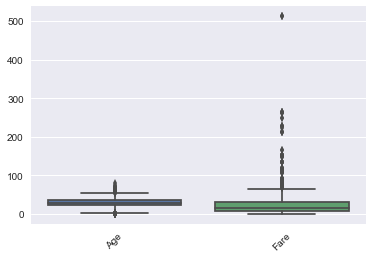

In [10]:
sns.boxplot(data=df.loc[:,['Age', 'Fare']])
plt.xticks(rotation=45)

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

# Modeling

Now we will build models that forecast the _TotalDelay_ using **Scikit Learn (sklearn)**.

## Train/test partitions

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

<img src="https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png" width=400></img>

- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [11]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
variables = df.columns[~df.columns.isin(['Survived'])]
X = df[variables].values

target = df.columns[0]
Y = df[target].values

X[1]

array([ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  1.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0. 

### Make partitions

We can use the **train_test_split** function in order to make the split. The **test_size=0.3** inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.

In [13]:
from sklearn.model_selection import train_test_split

# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(623, 157) (623,)
(268, 157) (268,)


We have now our data ready, we can now start creating our models.

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

## How to create a decision tree

In scikit-learn, the machine learning library for Python, a Decision Tree for classification can be created through the DecisionTreeClassifier class:

In [14]:
from sklearn.tree import DecisionTreeClassifier

For now let's create a simple Decision Tree letting scikit-learn choose all the model parameters:

In [15]:
decisiontree = DecisionTreeClassifier()

Once the tree is created, we can now train it on our training data, using the function **fit**. But let us first create a toy dataset to show how the whole procedure works, before using the Titanic data we prepared above.

In [16]:
Xtoy = pd.DataFrame(data=[[0, 0], [1, 1]], columns=["Number of Jumbos", "Procrastination ratio"])
ytoy = pd.DataFrame(data=[0, 1], columns=["Class"])

Now let's fit the tree to this toy data:

In [17]:
decisiontree.fit(Xtoy, ytoy)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

We can see above some information about the tree we just created, in particular that the **Gini** splitting criterion is being used.

Once the tree is trained we can use it to generate predictions over data. Reusing the same toy data:

In [18]:
decisiontree.predict(Xtoy)

array([0, 1])

If we compare these predictions agains the ytoy labels we can see that the tree has been able to correctly predict the class labels for the data. We can also compute a **score** for the tree based on the performance over these data:

In [19]:
decisiontree.score(Xtoy, ytoy)

1.0

For classification models (such a tree) the score method returns the accuracy, that is, the fraction of the test data the classifier can labely correclty. We obtain a 100% acccuracy! Not such a remarkable feat though, if we take into account we are predicting for a toy dataset, which furthermore was also used for training. But it has served us to portray the basic functions of a Decision Tree.

To further analyze the workings of the tree we can create a graphviz visualization of it. The following helper function will aid us on this task.

In [20]:
from sklearn import tree
from graphviz import Source

def plottree(decisiontree, features_names=None, class_names=None):
    """Returns a graphviz visualization of a scikit-learn decision tree
    
    Inputs
        - decisiontree: tree to visualize
        - feature_names: iterable with the names of the features present in the data.
        - class_names: iterable with the names of the classes present in the data, in increasing order.
        
    If the call to this function is the last line of a notebook cell, the tree is rendered automatically.
    """
    dot_data = tree.export_graphviz(
        decisiontree, 
        out_file=None, 
        filled=True, 
        rounded=True, 
        rotate=True,
        feature_names=features_names,
        class_names=class_names
    )
    return Source(dot_data)

Let's try it with the Decision Tree we just created. Note we can provide the visualization function with the names of the features and the classes to obtain a more understandable representation.

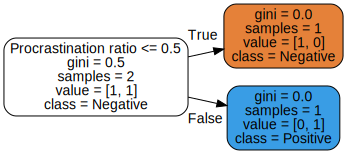

In [21]:
plottree(decisiontree, features_names=Xtoy.columns, class_names=["Negative", "Positive"])

We can see that the tree is made up of a root node, where the split is made in one of the variables at value 0.5. Before this split the Gini impurity is 0.5, as we have one pattern from each class. After this split we obtain two leaf nodes with 0 impurity, each of them containing a single pattern from either class.

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

## Analyzing the Titanic (and why Leonardo DiCaprio is dead)

We will now make use of a Decision Tree to obtain a classifier of survivors of the Titanic, and also to learn something about the kind of people who survived.

- http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

We will now create a new Decision Tree named titanictree and use the training subset you prepared above to fit this tree using the default tree parameters.

In [22]:
from sklearn.tree import DecisionTreeClassifier

titanictree = DecisionTreeClassifier()

titanictree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Now create a plot of the tree, replicating the steps above. Can you spot anything interesting? Do you think this representation of the model is intuitive?

<i>Take a look at the dataset attribute information to check which class correspondes to Deceased and which to Survived.</i>

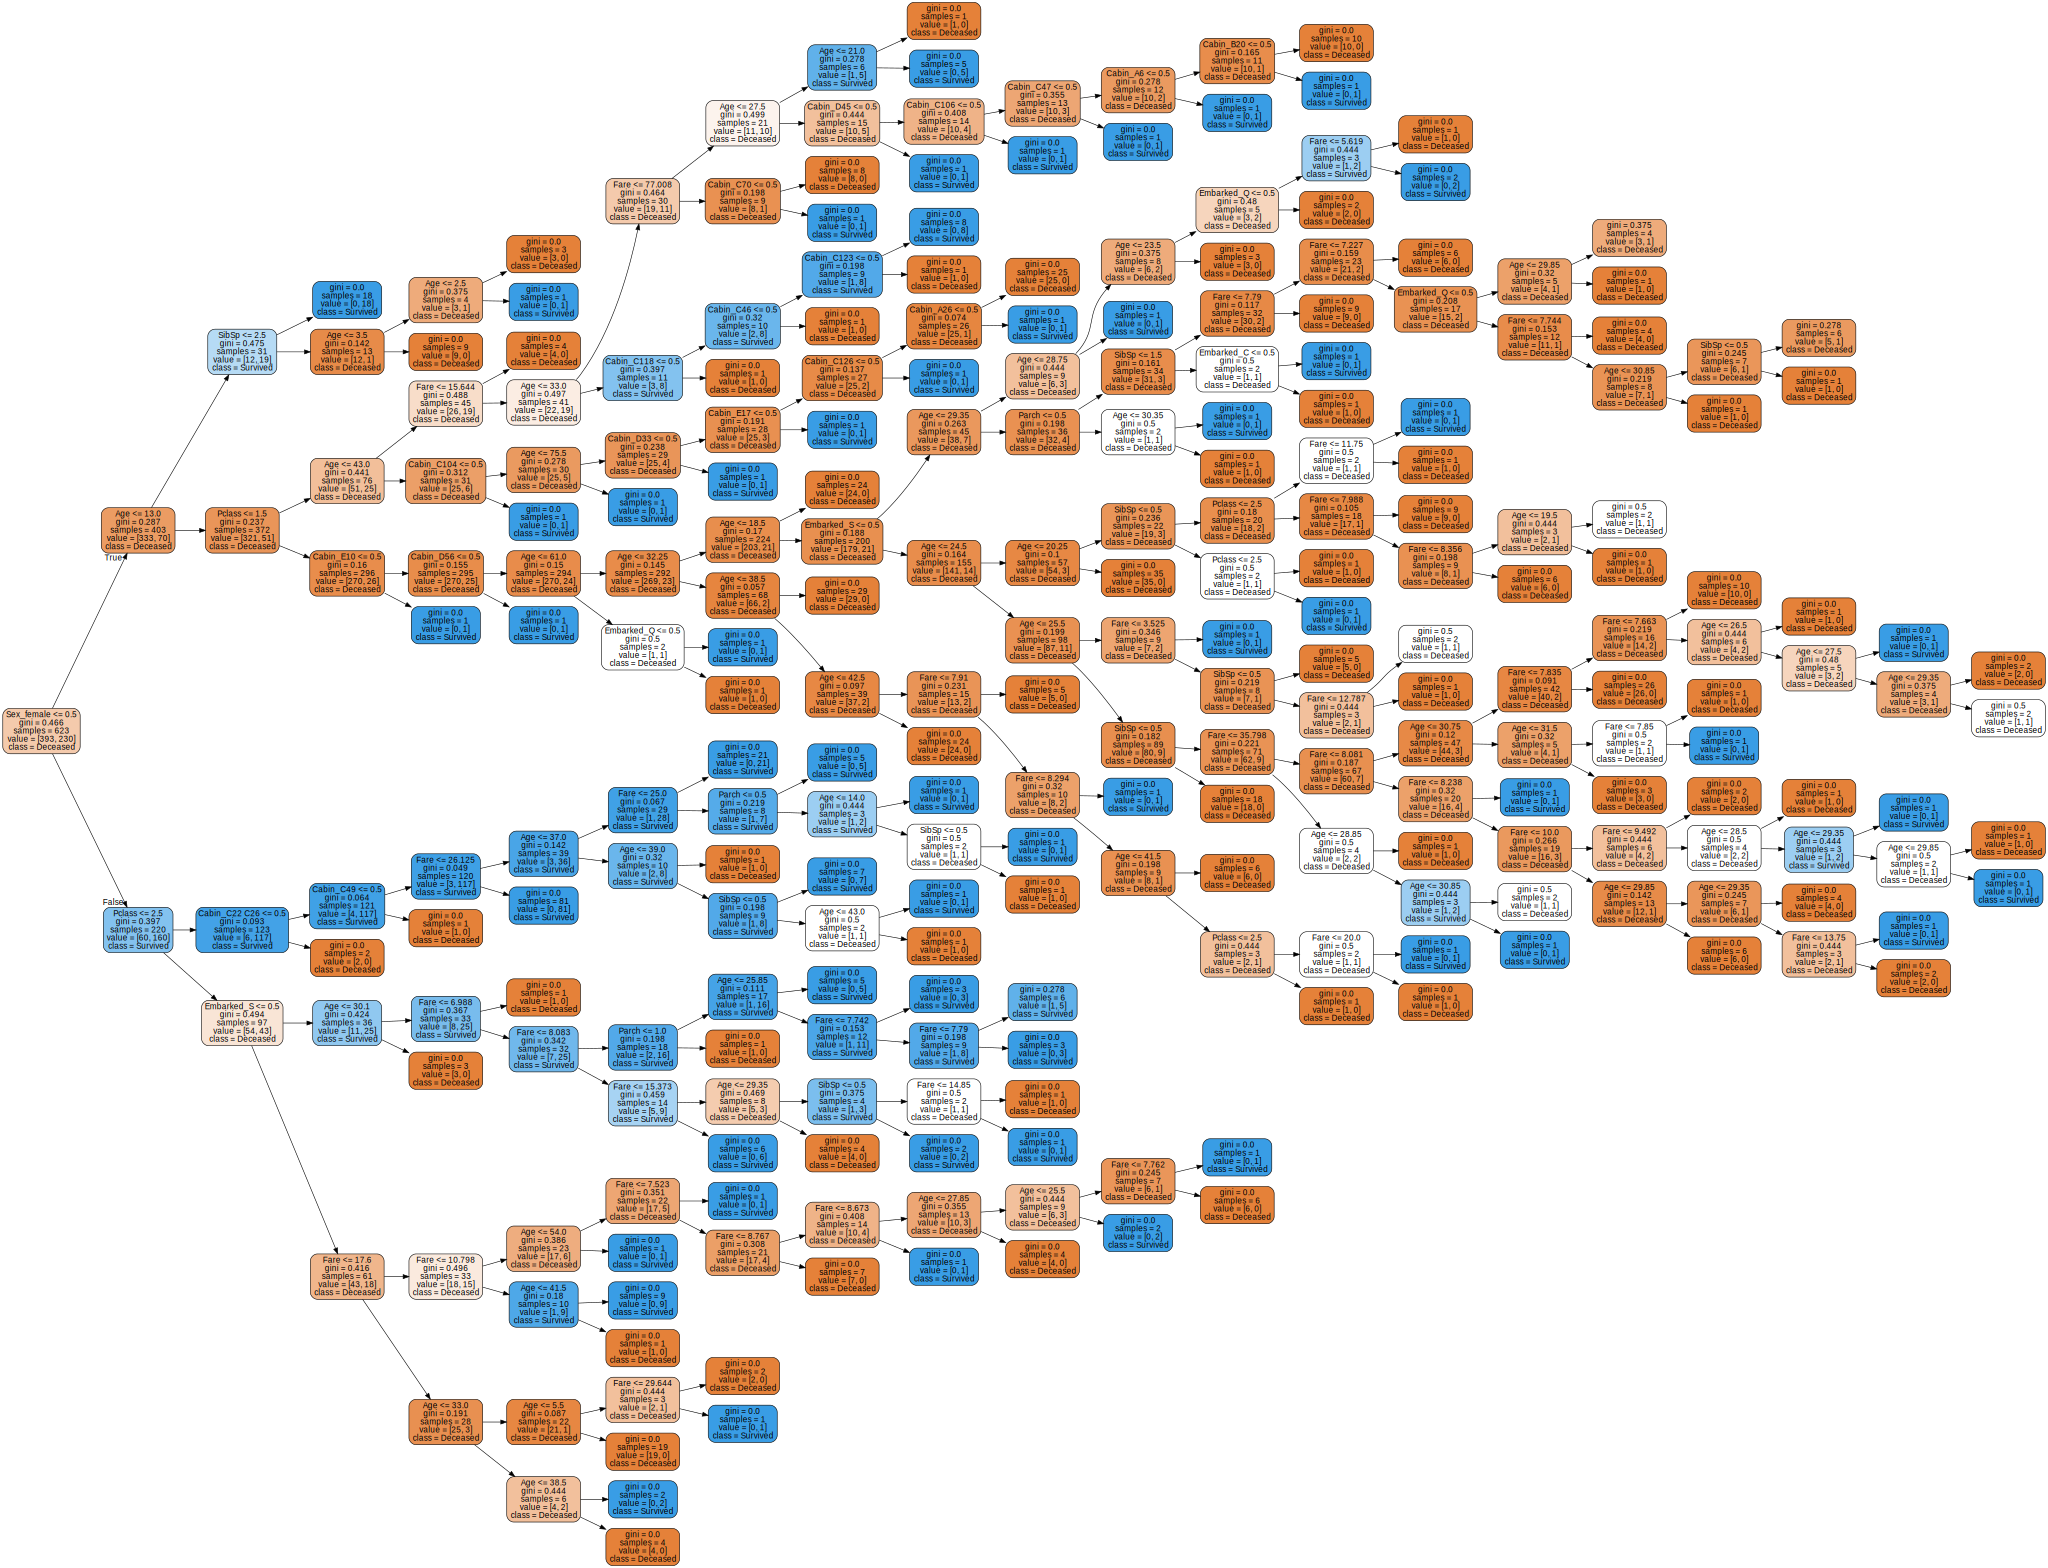

In [23]:
plottree(titanictree, features_names=variables, class_names=["Deceased", "Survived"])

The default classification tree will split the data into more and more nodes until no improvement in impurity can be gained. This is the reason we have obtained a very large tree. But how practical is this tree? Let's measure its performance over the test set. We can do this using the **score** function of the titanictree, following the standard scikit-learn interfaces.

Measure the score of the tree over the test set. Do you think it is any good?

In [24]:
titanictree.score(X_test, Y_test)

0.7723880597014925

### Explaining the tree, step by step

The tree we built above was too large for interpretation. Fortunately we can control the size of the tree, by specifying the **max_depth** parameter when we create the DecisionTreeClassifier object. We can exploit this to build smaller trees that have an easier interpretation.

We will now build a tree with max_depth=1, and train it on the Titanic data. Then print the accuracy of that tree on the test set, and plot the tree as well.

Which explanatory variable has been selected for the first (and only) split of the tree?

Does this make sense?

Tree accuracy is 0.7761194029850746


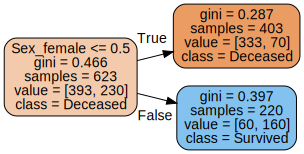

In [25]:
smalltree = DecisionTreeClassifier(max_depth=1)
smalltree.fit(X_train, Y_train)

print('Tree accuracy is {}'.format(smalltree.score(X_test, Y_test)))

plottree(smalltree, features_names=variables, class_names=['Deceased', 'Survived'])

- If the gender is not female (is male), there is a minor chance of survival

<hr>

Go further, build a tree with max_depth=2, and train it on the Titanic data. Then print the accuracy of that tree on the test set, and plot the tree as well.

Which other features are relevant for explaining the probability of survival of passengers?

Do these features make sense?

Tree accuracy is 0.7276119402985075


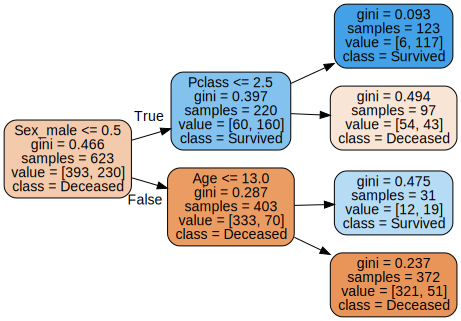

In [26]:
smalltree = DecisionTreeClassifier(max_depth=2)
smalltree.fit(X_train, Y_train)

print('Tree accuracy is {}'.format(smalltree.score(X_test, Y_test)))

plottree(smalltree, features_names=variables, class_names=['Deceased', 'Survived'])

- Female from first and second class: Survived
- Male under 13 years old: Survived

<hr>

Build yet another tree with **max_depth=3**, and train it on the Titanic data.  Then print the accuracy of that tree on the test set, and plot the tree as well.

Does any other relevant feature appear?

Can you spot any sign of overfitting?

Tree accuracy is 0.7686567164179104


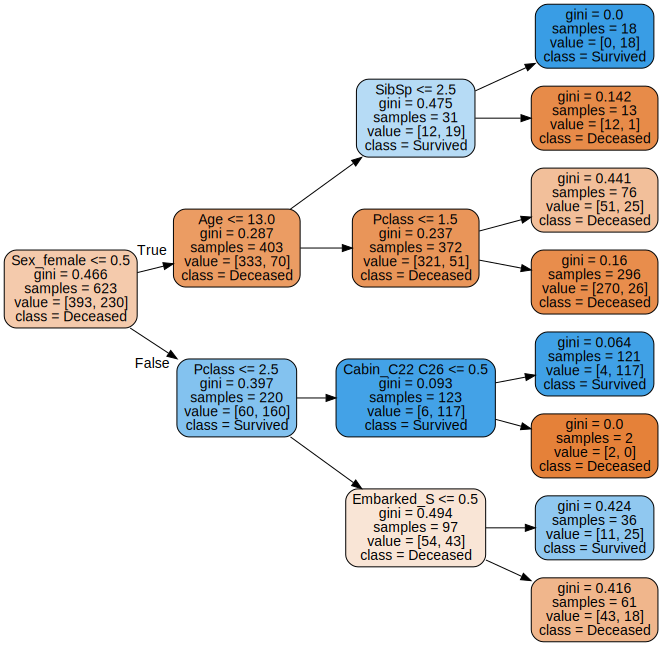

In [33]:
smalltree = DecisionTreeClassifier(max_depth=3)

smalltree.fit(X_train, Y_train)
print('Tree accuracy is {}'.format(smalltree.score(X_test, Y_test)))

plottree(smalltree, features_names=variables, class_names=['Deceased', 'Survived'])

Some rules are:

- Male + under 13 + less than 3 siblings: Survived
- Male + not baby: Deceased
- Female + first or second class: Survived
- Female + third class + not embarked in Southampton -> Survived
- Female + third class + embarked in Southampton -> Deceased

<hr>

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

### Pre-pruning the tree

Decision Trees are prone to overfitting, and so we must use some kind of **pruning** to generate trees that have good generalization properties. scikit-learn implements several **pre-pruning** mechanisms, which stop the splitting procedure of the tree after some conditions are met:

* **max_depth**: maximum depth at which the tree can continue creating splits.
* **min_samples_split**: the minimum number of samples required to split an internal node.
* **min_samples_leaf**: the minimum number of samples required to be at a leaf node.
* **max_leaf_nodes**: the maximum number of leaf (terminal) nodes that are allowed in the tree.
* **min_impurity_decrease**: a node will be split only if the split induces a decrease of the impurity greater than or equal to this value.

These paremeters are usually set through an independent validation set or some kind of cross-validation procedure. Here we will use a cross-validation strategy over the training set to test a range of different pre-pruning strategies. We will do so using the **GridSearchCV** class:

In [28]:
from sklearn.model_selection import GridSearchCV

And we will make use of the following grid of choices for the pre-pruning parameters:

In [29]:
param_grid = {
    'max_depth': [1, 2, 3, 4],
    'min_samples_split': [ 2, 5, 10, 20],
    'min_samples_leaf': [2, 5, 10, 20],
    'max_leaf_nodes': [2, 5, 10, 20],
    'min_impurity_decrease': [1e-3, 1e-2, 1e-1]
}

Now we run a **GridSearchCV crossvalidation** to find the best pre-pruned tree over the training data, using the grid of parameters above.

Check the docs to understand how this can be done.

- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

As a result of this cell you should have a fitted GridSearchCV model for a DecisionTreeClassifier under the variable treesearch.

In [30]:
treesearch = GridSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_grid=param_grid
)

treesearch.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [2, 5, 10, 20], 'max_leaf_nodes': [2, 5, 10, 20], 'min_impurity_decrease': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

If done correctly, the following should show information on the best pre-pruned tree found by our GridSearchCV

In [31]:
treesearch.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Now print the accuracy of the best pruned tree over the test set, and also plot such tree.

Answer the following questions:
- is the tree interpretable?
- Does any non-relevant variable appear in the tree?
- Do you think some kind of post-pruning strategy could reduce further the size of the tree without damaging performance?

Tree accuracy is 0.7761194029850746


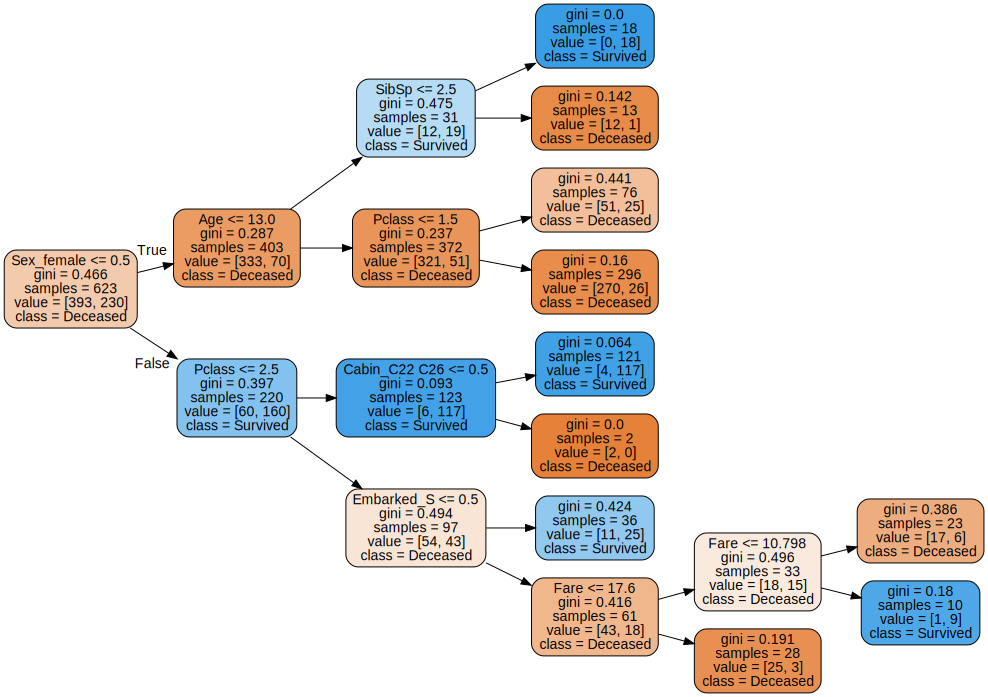

In [32]:
print('Tree accuracy is {}'.format(treesearch.score(X_test, Y_test)))

plottree(treesearch.best_estimator_, features_names=variables, class_names=['Deceased', 'Survived'])

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)